4. Mini-project

B

In [1]:
import torch as th
from torch.utils.data import DataLoader
import torchvision
import matplotlib.pyplot as plt
import numpy as np

from model.CNN import CNN

In [2]:
train_ds = torchvision.datasets.FashionMNIST(
    root = "data", download=False, train=True, transform=torchvision.transforms.ToTensor()
    )
test_ds = torchvision.datasets.FashionMNIST(
    root = "data", download=False, train=False, transform=torchvision.transforms.ToTensor()
    )

In [3]:
print(train_ds)

batch_size = 10

train_dataloader = DataLoader(train_ds, batch_size=batch_size)
test_dataloader = DataLoader(test_ds, batch_size=batch_size)

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [4]:
print(len(train_dataloader))
it = iter(train_dataloader)

6000


<class 'torch.Tensor'> <class 'torch.Tensor'>
tensor(9)
types: 10
b: 10, c: 1, h: 28, w: 28


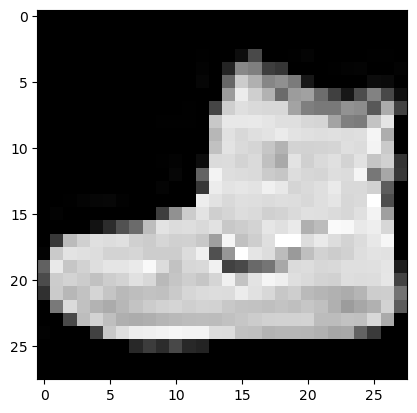

In [5]:
X, y = next(it)
print(type(X), type(y))
plt.imshow(torchvision.transforms.ToPILImage()(X[0].squeeze()), cmap="gray")
print(y[0])

types = len(set([i.item() for _, y in train_dataloader for i in y]))
print(f"types: {types}")

b, c, h, w = X.size()
print(f"b: {b}, c: {c}, h: {h}, w: {w}")

In [6]:
model = CNN(c, types)

In [7]:
device = "cuda" if th.cuda.is_available() else "cpu"
optimizer = th.optim.SGD(model.parameters(), lr=1e-3, momentum=0.9)
epochs = 10
loss_fn = th.nn.CrossEntropyLoss()

model.to(device)

CNN(
  (net): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU()
    (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=256, out_features=120, bias=True)
    (8): ReLU()
    (9): Linear(in_features=120, out_features=84, bias=True)
    (10): ReLU()
    (11): Linear(in_features=84, out_features=10, bias=True)
  )
)

In [8]:
for epoch in range(epochs):
    print(f"epoch: {epoch}")
    for batch, (X, y) in enumerate(train_dataloader):
        X, y = X.to(device), y.to(device)
        
        pred = model(X)
        loss = loss_fn(pred, y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (batch + 1) % 1000 == 0:
            print(f"loss:{loss.item():>7f} [{(batch + 1) * len(X)} / {len(train_dataloader) * batch_size}]")
        

epoch: 0


loss:2.242641 [10000 / 60000]
loss:0.641759 [20000 / 60000]
loss:0.874264 [30000 / 60000]
loss:1.526585 [40000 / 60000]
loss:0.619898 [50000 / 60000]
loss:0.352484 [60000 / 60000]
epoch: 1
loss:1.061969 [10000 / 60000]
loss:0.459666 [20000 / 60000]
loss:0.637282 [30000 / 60000]
loss:1.424178 [40000 / 60000]
loss:0.451333 [50000 / 60000]
loss:0.248811 [60000 / 60000]
epoch: 2
loss:0.853645 [10000 / 60000]
loss:0.384401 [20000 / 60000]
loss:0.534696 [30000 / 60000]
loss:0.999536 [40000 / 60000]
loss:0.368034 [50000 / 60000]
loss:0.199707 [60000 / 60000]
epoch: 3
loss:0.757039 [10000 / 60000]
loss:0.410642 [20000 / 60000]
loss:0.406431 [30000 / 60000]
loss:0.817898 [40000 / 60000]
loss:0.337144 [50000 / 60000]
loss:0.179391 [60000 / 60000]
epoch: 4
loss:0.743850 [10000 / 60000]
loss:0.436317 [20000 / 60000]
loss:0.388376 [30000 / 60000]
loss:0.718061 [40000 / 60000]
loss:0.288389 [50000 / 60000]
loss:0.158783 [60000 / 60000]
epoch: 5
loss:0.700962 [10000 / 60000]
loss:0.460149 [20000 / 60

In [9]:
sum_test = 10.0

acc = 0
for X, y in test_dataloader:
    y_pred = model(X)
    print(y_pred)
    print(y)
    acc = (y_pred.argmax(1) == y).sum().item()
    break
        
print(acc / sum_test)

tensor([[-2.2631, -4.1803, -4.6578, -3.7943, -5.1490,  6.3618, -5.5322,  8.1069,
         -0.1875, 11.1112],
        [ 1.2946, -2.8515, 12.0808, -1.6228,  8.0839, -6.0687,  3.4614, -6.8658,
         -1.4052, -6.4405],
        [ 3.2053, 15.9340, -1.7197,  4.5735,  1.5163, -7.4186, -1.6781, -3.4020,
         -0.1936, -6.6411],
        [ 2.7868, 15.7845, -2.6352,  5.1899,  1.7322, -6.8181, -0.1461, -4.2524,
         -2.2463, -5.7485],
        [ 3.9787, -3.6048,  3.9978,  1.8335,  2.2683, -4.5877,  6.7304, -5.6646,
          0.3744, -6.1273],
        [ 3.5717, 13.2587, -1.4811,  2.5705,  1.7948, -6.9847, -1.2324, -3.3845,
          0.2552, -5.8385],
        [ 0.3963, -1.9360,  8.2299, -1.4462, 10.7798, -5.6929,  4.6630, -6.8843,
         -0.6016, -6.0194],
        [ 1.6371, -4.3999,  5.8318, -0.7963,  8.4195, -4.6410, 10.1860, -7.4849,
         -1.7119, -6.4242],
        [-1.7214, -1.9492, -2.7421, -3.6471, -1.4820, 10.1082, -2.9612,  6.3357,
          2.1325, -2.6975],
        [-3.1537, -